# Sentiment Analysis

_Artificial Intelligence Nanodegree Program | Natural Language Processing_

---

With the rise of online social media platforms like Twitter, Facebook and Reddit, and the proliferation of customer reviews on sites like Amazon and Yelp, we now have access, more than ever before, to massive text-based data sets! They can be analyzed in order to determine how large portions of the population feel about certain products, events, etc. This sort of analysis is called _sentiment analysis_. In this notebook you will build an end-to-end sentiment classification system from scratch.

## Instructions

Some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this notebook. You will not need to modify the included code beyond what is requested. Sections that begin with '**TODO**' in the header indicate that you need to complete or implement some portion within them. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `# TODO: ...` comment. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions for you to answer which relate to the task and your implementation. Each section where you will answer a question is preceded by a '**Question:**' header. Carefully read each question and provide your answer below the '**Answer:**' header by editing the Markdown cell.

> **Note**: Code and Markdown cells can be executed using the **Shift+Enter** keyboard shortcut. In addition, a cell can be edited by typically clicking it (double-click for Markdown cells) or by pressing **Enter** while it is highlighted.

## Step 1: Exploring the data!

The dataset we are going to use is very popular among researchers in Natural Language Processing, usually referred to as the [IMDb dataset](http://ai.stanford.edu/~amaas/data/sentiment/). It consists of movie reviews from the website [imdb.com](http://www.imdb.com/), each labeled as either '**pos**itive', if the reviewer enjoyed the film, or '**neg**ative' otherwise.

> Maas, Andrew L., et al. [Learning Word Vectors for Sentiment Analysis](http://ai.stanford.edu/~amaas/data/sentiment/). In _Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies_. Association for Computational Linguistics, 2011.

We have provided the dataset for you. You can load it in by executing the Python cell below.

In [1]:
import os
import glob

def read_imdb_data(data_dir='../data/imdb-reviews'):
    """Read IMDb movie reviews from given directory.
    
    Directory structure expected:
    - data/
        - train/
            - pos/
            - neg/
        - test/
            - pos/
            - neg/
    
    """

    # Data, labels to be returned in nested dicts matching the dir. structure
    data = {}
    labels = {}

    # Assume 2 sub-directories: train, test
    for data_type in ['train', 'test']:
        data[data_type] = {}
        labels[data_type] = {}

        # Assume 2 sub-directories for sentiment (label): pos, neg
        for sentiment in ['pos', 'neg']:
            data[data_type][sentiment] = []
            labels[data_type][sentiment] = []
            
            # Fetch list of files for this sentiment
            path = os.path.join(data_dir, data_type, sentiment, '*.txt')
            files = glob.glob(path)
            
            # Read reviews data and assign labels
            for f in files:
                with open(f) as review:
                    data[data_type][sentiment].append(review.read())
                    labels[data_type][sentiment].append(sentiment)
            
            assert len(data[data_type][sentiment]) == len(labels[data_type][sentiment]), \
                    "{}/{} data size does not match labels size".format(data_type, sentiment)
    
    # Return data, labels as nested dicts
    return data, labels


data, labels = read_imdb_data()
print("IMDb reviews: train = {} pos / {} neg, test = {} pos / {} neg".format(
        len(data['train']['pos']), len(data['train']['neg']),
        len(data['test']['pos']), len(data['test']['neg'])))

IMDb reviews: train = 12500 pos / 12500 neg, test = 12500 pos / 12500 neg


Now that the data is loaded in, let's take a quick look at one of the positive reviews:

In [2]:
print(data['train']['pos'][2])

I haven't liked many TV shows post 1990, but THAT 70S SHOW is great. Never seeing it during it's first run, thinking a gimmicky period piece, I was wrong! I started watching in reruns and the more I watched, the more I liked! Now, it is the only show premiering post-1990 that I watch regularly.<br /><br />Although THAT 70S SHOW mimics some of the styles, attitudes, music, and tastes of the 70s, it does not mire itself in that decade by going overboard with the references and look of the 70s. It contains so much funny, witty, biting dialogue that is delivered with confidence and certainty by its main cast that it overcomes any 70s clichés by just being humorous. The humor is what keeps the show eternally watchable.<br /><br />Although a hilarious sitcom, no matter what time period, the uniqueness of mocking the 70s does work in its favor as it gives the show a signature identity. But its the focus on universal issues (family problems, teen angst, marital issues, peer pressure), dealing 

And one with a negative sentiment:

In [3]:
print(data['train']['neg'][2])

This really should deserve a "O" rating, or even a negative ten. I watched this show for ages, and the show jumped the shark around series 7. This episode, however, is proof that the show has jumped the shark. It's writing is lazy, absurd, self-indulgent and not even worthy of rubbish like Beavis and Butthead.<br /><br />It is quite possible to be ridiculous and still be fun -- Pirates of the Caribbean, the Mummy, Count of Monte Cristo -- all "fun" movies that are not to be taken seriously. However, there is such thing as ridiculous as in "this is the worst thing I've ever seen." And indeed, this is the worst episode of Stargate I've ever seen. It's absolutely dreadful, and this coming from someone with a stargate in her basement.<br /><br />Makes me want to sell all of my stargate props, most seriously.


We can also make a wordcloud visualization of the reviews.

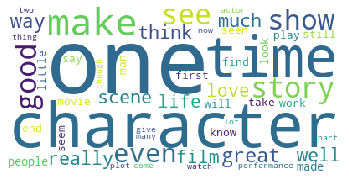

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

sentiment = 'pos'

# Combine all reviews for the desired sentiment
combined_text = " ".join([review for review in data['train'][sentiment]])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50,
        # update stopwords to include common words like film and movie
        stopwords = STOPWORDS.update(['br','film','movie']))

# Generate and plot wordcloud
plt.imshow(wc.generate(combined_text))
plt.axis('off')
plt.show()

Try changing the sentiment to `'neg'` and see if you can spot any obvious differences between the wordclouds.

### TODO: Form training and test sets

Now that you've seen what the raw data looks like, combine the positive and negative documents to get one unified training set and one unified test set.

In [6]:
from sklearn.utils import shuffle
import pandas as pd
def prepare_imdb_data(data):
    """Prepare training and test sets from IMDb movie reviews."""
    result = dict()
    # TODO: Combine positive and negative reviews and labels
    for dataset in data.keys():
        result["data_"+dataset]=[]
        result["labels_"+dataset]=[]
        for sentiment in data[dataset].keys():
            result["data_"+dataset].extend(data[dataset][sentiment])
            result["labels_"+dataset].extend([sentiment]* len(data[dataset][sentiment]))
    
    data_train = result["data_train"]
    data_test = result["data_test"]
    labels_train = result["labels_train"]
    labels_test = result["labels_test"]
    # TODO: Shuffle reviews and corresponding labels within training and test sets
    data_train, labels_train = shuffle(data_train, labels_train)
    data_test, labels_test = shuffle(data_test, labels_test)
    
    # Return a unified training data, test data, training labels, test labets
    return data_train, data_test, labels_train, labels_test

result = prepare_imdb_data(data)

data_train, data_test, labels_train, labels_test = prepare_imdb_data(data)
print("IMDb reviews (combined): train = {}, test = {}".format(len(data_train), len(data_test)))

IMDb reviews (combined): train = 25000, test = 25000


## Step 2. Preprocessing

As you might have noticed in the sample reviews, our raw data includes HTML. Therefore there are HTML tags that need to be removed. We also need to remove non-letter characters, normalize uppercase letters by converting them to lowercase, tokenize, remove stop words, and stem the remaining words in each document.

### TODO: Convert each review to words

As your next task, you should complete the function `review_to_words()` that performs all these steps. For your convenience, in the Python cell below we provide you with all the libraries that you may need in order to accomplish these preprocessing steps. Make sure you can import all of them! (If not, pip install from a terminal and run/import again.)

In [7]:
# BeautifulSoup to easily remove HTML tags
from bs4 import BeautifulSoup 

# RegEx for removing non-letter characters
import re

# NLTK library for the remaining steps
import nltk
nltk.download("stopwords")   # download list of stopwords (only once; need not run it again)
from nltk.corpus import stopwords # import stopwords

from nltk.stem.porter import *
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /home/ope/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
def review_to_words(review):
    """Convert a raw review string into a sequence of words."""
    
    # TODO: Remove HTML tags and non-letters,
    #       convert to lowercase, tokenize,
    #       remove stopwords and stem
    # Remove  html tags
    soup = BeautifulSoup(review,"html5lib")
    review = soup.get_text()
    
    #punctuationRemoval
    review = re.sub(r"[^A-z0-9]", " ", review)
    
    #Lowercasing
    review = review.lower()
    
    #tokenize
    words = review.split()
    
    #remove stopwords
    words = [word for word in words if word not in stopwords.words("english")]
    
    #stem
    words = [stemmer.stem(word)for word in words]
    # Return final list of words
    return words


review_to_words("""This is just a <em>test</em>.<br/><br />
But if it wasn't a test, it would make for a <b>Great</b> movie review!""")

['test', 'test', 'would', 'make', 'great', 'movi', 'review']

With the function `review_to_words()` fully implemneted, we can apply it to all reviews in both training and test datasets. This may take a while, so let's build in a mechanism to write to a cache file and retrieve from it later.

In [9]:
import pickle

cache_dir = os.path.join("cache", "sentiment_analysis")  # where to store cache files
os.makedirs(cache_dir, exist_ok=True)  # ensure cache directory exists

def preprocess_data(data_train, data_test, labels_train, labels_test,
                    cache_dir=cache_dir, cache_file="preprocessed_data.pkl"):
    """Convert each review to words; read from cache if available."""

    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = pickle.load(f)
            print("Read preprocessed data from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # Preprocess training and test data to obtain words for each review
        words_train = list(map(review_to_words, data_train))
        words_test = list(map(review_to_words, data_test))
        
        # Write to cache file for future runs
        if cache_file is not None:
            cache_data = dict(words_train=words_train, words_test=words_test,
                              labels_train=labels_train, labels_test=labels_test)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                pickle.dump(cache_data, f)
            print("Wrote preprocessed data to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        words_train, words_test, labels_train, labels_test = (cache_data['words_train'],
                cache_data['words_test'], cache_data['labels_train'], cache_data['labels_test'])
    
    return words_train, words_test, labels_train, labels_test


# Preprocess data
words_train, words_test, labels_train, labels_test = preprocess_data(
        data_train, data_test, labels_train, labels_test)

# Take a look at a sample
print("\n--- Raw review ---")
print(data_train[1])
print("\n--- Preprocessed words ---")
print(words_train[1])
print("\n--- Label ---")
print(labels_train[1])

Read preprocessed data from cache file: preprocessed_data.pkl

--- Raw review ---
A new way to enjoy Goldsworthy's work, Rivers and Tides allows fans to see his work in motion. Watching Goldsworthy build his pieces, one develops an appreciation for every stone, leaf, and thorn that he uses. Goldsworthy describes how the flow of life, the rivers, and the tides inspires and affects his work. Although, I was happy the film covered the majority of Goldsworthy's pieces (no snowballs), I do feel it was a bit long. The film makers did a wonderful job of bringing Goldsworthy's work to life, and created a beautiful film that was a joy to watch.

--- Preprocessed words ---
['anim', 'good', 'imageri', 'good', 'although', 'total', 'origin', 'howev', 'stori', 'long', 'way', 'confus', 'top', 'dramat', 'hour', 'wait', 'get', 'mani', 'charact', 'noth', 'contribut', 'plot', 'element', 'either', 'come', 'nowher', 'go', 'nowher', 'movi', 'realli', 'one', 'movi', 'would', 'better', 'short', 'seri', 'possi

## Step 3: Extracting Bag-of-Words features

Now that each document has been preprocessed, we can transform each into a Bag-of-Words feature representation. Note that we need to create this transformation based on the training data alone, as we are not allowed to peek at the testing data at all!

The dictionary or _vocabulary_ $V$ (set of words shared by documents in the training set) used here will be the one on which we train our supervised learning algorithm. Any future test data must be transformed in the same way for us to be able to apply the learned model for prediction. Hence, it is important to store the transformation / vocabulary as well.

> **Note**: The set of words in the training set may not be exactly the same as the test set. What do you do if you encounter a word during testing that you haven't seen before? Unfortunately, we'll have to ignore it, or replace it with a special `<UNK>` token.

### TODO: Compute Bag-of-Words features

Implement the `extract_BoW_features()` function, apply it to both training and test datasets, and store the results in `features_train` and `features_test` NumPy arrays, respectively. Choose a reasonable vocabulary size, say $|V| = 5000$, and keep only the top $|V|$ occuring words and discard the rest. This number will also serve as the number of columns in the BoW matrices.

> **Hint**: You may find it useful to take advantage of `CountVectorizer` from scikit-learn. Also make sure to pickle your Bag-of-Words transformation so that you can use it in future.

In [10]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.externals import joblib
# joblib is an enhanced version of pickle that is more efficient for storing NumPy arrays

def extract_BoW_features(words_train, words_test, vocabulary_size=5000,
                         cache_dir=cache_dir, cache_file="bow_features.pkl"):
    """Extract Bag-of-Words for a given set of documents, already preprocessed into words."""
    
    # If cache_file is not None, try to read from it first
    cache_data = None
    if cache_file is not None:
        try:
            with open(os.path.join(cache_dir, cache_file), "rb") as f:
                cache_data = joblib.load(f)
            print("Read features from cache file:", cache_file)
        except:
            pass  # unable to read from cache, but that's okay
    
    # If cache is missing, then do the heavy lifting
    if cache_data is None:
        # TODO: Fit a vectorizer to training documents and use it to transform them
        # NOTE: Training documents have already been preprocessed and tokenized into words;
        #       pass in dummy functions to skip those steps, e.g. preprocessor=lambda x: x
        vectorizer = CountVectorizer(max_features=vocabulary_size, preprocessor=lambda x: x, tokenizer=lambda x: x)
        features_train = vectorizer.fit_transform(words_train).toarray()

        # TODO: Apply the same vectorizer to transform the test documents (ignore unknown words)
        features_test = vectorizer.fit_transform(words_test).toarray()
        
        # NOTE: Remember to convert the features using .toarray() for a compact representation
        
        # Write to cache file for future runs (store vocabulary as well)
        if cache_file is not None:
            vocabulary = vectorizer.vocabulary_
            cache_data = dict(features_train=features_train, features_test=features_test,
                             vocabulary=vocabulary)
            with open(os.path.join(cache_dir, cache_file), "wb") as f:
                joblib.dump(cache_data, f)
            print("Wrote features to cache file:", cache_file)
    else:
        # Unpack data loaded from cache file
        features_train, features_test, vocabulary = (cache_data['features_train'],
                cache_data['features_test'], cache_data['vocabulary'])
    
    # Return both the extracted features as well as the vocabulary
    return features_train, features_test, vocabulary


# Extract Bag of Words features for both training and test datasets
features_train, features_test, vocabulary = extract_BoW_features(words_train, words_test)

# Inspect the vocabulary that was computed
print("Vocabulary: {} words".format(len(vocabulary)))

import random
print("Sample words: {}".format(random.sample(list(vocabulary.keys()), 8)))

# Sample
print("\n--- Preprocessed words ---")
print(words_train[5])
print("\n--- Bag-of-Words features ---")
print(features_train[5])
print("\n--- Label ---")
print(labels_train[5])

/home/ope/anaconda3/envs/nlp/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


Read features from cache file: bow_features.pkl
Vocabulary: 5000 words
Sample words: ['behavior', 'piti', 'neg', 'crystal', 'claustrophob', 'offer', 'bigger', 'aztec']

--- Preprocessed words ---
['saw', 'movi', 'day', 'ago', 'game', 'jump', 'scari', 'part', 'must', 'admit', 'found', 'pretti', 'decent', 'start', 'think', 'charact', 'say', 'logic', 'problem', '1', 'boyfriend', 'seem', 'pretti', 'fit', 'dude', 'make', 'sound', 'kill', 'think', 'might', 'least', 'tri', 'take', 'killer', '2', 'remark', 'made', 'gym', 'teacher', 'soooo', 'love', 'lisa', 'almost', 'scream', 'screen', 'best', 'friend', 'famili', 'kill', 'teacher', 'love', 'make', 'comment', 'like', 'half', 'heart', '3', 'soon', 'nash', 'ask', 'uncl', 'mani', 'exit', 'hous', 'uncl', 'catch', 'may', 'danger', 'ahead', 'smart', 'thing', 'get', 'donna', 'boyfriend', 'aunt', 'uncl', 'car', 'drive', 'far', 'far', 'away', 'bait', 'hous', 'hrt', 'polic', 'forc', 'killer', 'way', 'get', 'could', 'go', 'basic', 'plot', 'decent', 'chara

Let's try to visualize the Bag-of-Words feature vector for one of our training documents.

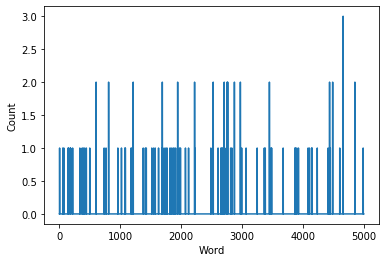

In [11]:
# Plot the BoW feature vector for a training document
plt.plot(features_train[5,:])
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()

#### Question: Reflecting on Bag-of-Words feature representation

What is the average sparsity level of BoW vectors in our training set? In other words, on average what percentage of entries in a BoW feature vector are zero?

#### Answer:

In [12]:
def sparsity_calc(vector):
    unique, counts = np.unique(vector, return_counts=True)
    elemWithCounts = dict(zip(unique, counts))
    return elemWithCounts[0]/len(vector)
    

print(round(sum(map(sparsity_calc,features_train))/len(features_train)* 100, 1), "% of vectors are zero")

98.3 % of vectors are zero


### Zipf's law


[Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), named after the famous American linguist George Zipf, is an empirical law stating that given a large collection of documents, the frequency of any word is inversely proportional to its rank in the frequency table. So the most frequent word will occur about twice as often as the second most frequent word, three times as often as the third most frequent word, and so on. In the figure below we plot number of appearances of each word in our training set against its rank.

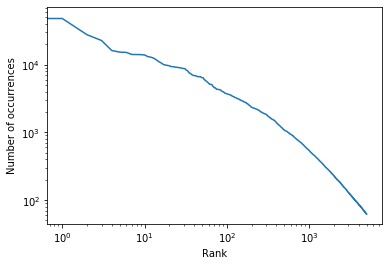

In [13]:
# Find number of occurrences for each word in the training set
word_freq = features_train.sum(axis=0)

# Sort it in descending order
sorted_word_freq = np.sort(word_freq)[::-1]

# Plot 
plt.plot(sorted_word_freq)
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.xlabel('Rank')
plt.ylabel('Number of occurrences')
plt.show()

#### Question: Zipf's law
What is the total number of occurrences of the most frequent word? What is the the total number of occurrences of the second most frequent word? Do your numbers follow  Zipf's law? If not, why?

In [14]:
sorted_word_freq[:2]

array([51694, 48187])

#### Answer:

The numbers don't follow Zipf's law. Lemmatization/ Stemming probably ensured that.

### TODO: Normalize feature vectors

Bag-of-Words features are intuitive to understand as they are simply word counts. But counts can vary a lot, and potentially throw off learning algorithms later in the pipeline. So, before we proceed further, let's normalize the BoW feature vectors to have unit length.

This makes sure that each document's representation retains the unique mixture of feature components, but prevents documents with large word counts from dominating those with fewer words.

In [15]:
import sklearn.preprocessing as pr

# TODO: Normalize BoW features in training and test set so that the sum of all the vectors = 1
features_train = pr.normalize(features_train)
features_test = pr.normalize(features_test)

In [16]:
features_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.03592106, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.17407766, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

## Step 5: Switching gears - RNNs

We just saw how the task of sentiment analysis can be solved via a traditional machine learning approach: BoW + a nonlinear classifier. We now switch gears and use Recurrent Neural Networks, and in particular LSTMs, to perform sentiment analysis in Keras. Conveniently, Keras has a built-in [IMDb movie reviews dataset](https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification) that we can use, with the same vocabulary size.

In [76]:
from keras.datasets import imdb  # import the built-in imdb dataset in Keras

# Set the vocabulary size
vocabulary_size = 5000

# Load in training and test data (note the difference in convention compared to scikit-learn)
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocabulary_size)
print("Loaded dataset with {} training samples, {} test samples".format(len(X_train), len(X_test)))

Loaded dataset with 25000 training samples, 25000 test samples


In [77]:
# Inspect a sample review and its label
print("--- Review ---")
print(X_train[7])
print("--- Label ---")
print(y_train[7])

--- Review ---
[1, 4, 2, 716, 4, 65, 7, 4, 689, 4367, 2, 2343, 4804, 2, 2, 2, 2, 2315, 2, 2, 2, 2, 4, 2, 628, 2, 37, 9, 150, 4, 2, 4069, 11, 2909, 4, 2, 847, 313, 6, 176, 2, 9, 2, 138, 9, 4434, 19, 4, 96, 183, 26, 4, 192, 15, 27, 2, 799, 2, 2, 588, 84, 11, 4, 3231, 152, 339, 2, 42, 4869, 2, 2, 345, 4804, 2, 142, 43, 218, 208, 54, 29, 853, 659, 46, 4, 882, 183, 80, 115, 30, 4, 172, 174, 10, 10, 1001, 398, 1001, 1055, 526, 34, 3717, 2, 2, 2, 17, 4, 2, 1094, 871, 64, 85, 22, 2030, 1109, 38, 230, 9, 4, 4324, 2, 251, 2, 1034, 195, 301, 14, 16, 31, 7, 4, 2, 8, 783, 2, 33, 4, 2945, 103, 465, 2, 42, 845, 45, 446, 11, 1895, 19, 184, 76, 32, 4, 2, 207, 110, 13, 197, 4, 2, 16, 601, 964, 2152, 595, 13, 258, 4, 1730, 66, 338, 55, 2, 4, 550, 728, 65, 1196, 8, 1839, 61, 1546, 42, 2, 61, 602, 120, 45, 2, 6, 320, 786, 99, 196, 2, 786, 2, 4, 225, 4, 373, 1009, 33, 4, 130, 63, 69, 72, 1104, 46, 1292, 225, 14, 66, 194, 2, 1703, 56, 8, 803, 1004, 6, 2, 155, 11, 4, 2, 3231, 45, 853, 2029, 8, 30, 6, 117, 430

Notice that the label is an integer (0 for negative, 1 for positive), and the review itself is stored as a sequence of integers. These are word IDs that have been preassigned to individual words. To map them back to the original words, you can use the dictionary returned by `imdb.get_word_index()`.

In [78]:
# Map word IDs back to words
word2id = imdb.get_word_index()
id2word = {i: word for word, i in word2id.items()}
print("--- Review (with words) ---")
print([id2word.get(i, " ") for i in X_train[7]])
print("--- Label ---")
print(y_train[7])

--- Review (with words) ---
['the', 'of', 'and', 'local', 'of', 'their', 'br', 'of', 'attention', 'widow', 'and', 'captures', 'parties', 'and', 'and', 'and', 'and', 'excitement', 'and', 'and', 'and', 'and', 'of', 'and', 'english', 'and', 'like', 'it', 'years', 'of', 'and', 'unintentional', 'this', 'hitchcock', 'of', 'and', 'learn', 'everyone', 'is', 'quite', 'and', 'it', 'and', 'such', 'it', 'bonus', 'film', 'of', 'too', 'seems', 'he', 'of', 'enough', 'for', 'be', 'and', 'editing', 'and', 'and', 'please', 'great', 'this', 'of', 'shoots', 'thing', '3', 'and', "it's", 'mentioning', 'and', 'and', 'given', 'parties', 'and', 'back', 'out', 'interesting', 'times', 'no', 'all', 'average', 'talking', 'some', 'of', 'nor', 'seems', 'into', 'best', 'at', 'of', 'every', 'cast', 'i', 'i', 'inside', 'keep', 'inside', 'large', 'viewer', 'who', 'obscure', 'and', 'and', 'and', 'movie', 'of', 'and', 'entirely', "you've", 'see', 'because', 'you', 'deals', 'successful', 'her', 'anything', 'it', 'of', 'ded

Unlike our Bag-of-Words approach, where we simply summarized the counts of each word in a document, this representation essentially retains the entire sequence of words (minus punctuation, stopwords, etc.). This is critical for RNNs to function. But it also means that now the features can be of different lengths!

#### Question: Variable length reviews

What is the maximum review length (in terms of number of words) in the training set? What is the minimum?

#### Answer:

In [79]:
print(max(map(len, X_train)))
print(min(map(len, X_train)))

2494
11


### TODO: Pad sequences

In order to feed this data into your RNN, all input documents must have the same length. Let's limit the maximum review length to `max_words` by truncating longer reviews and padding shorter reviews with a null value (0). You can accomplish this easily using the [`pad_sequences()`](https://keras.io/preprocessing/sequence/#pad_sequences) function in Keras. For now, set `max_words` to 500.

In [80]:
from keras.preprocessing import sequence

# Set the maximum number of words per document (for both training and testing)
max_words = 500

# TODO: Pad sequences in X_train and X_test
X_train = sequence.pad_sequences(X_train, max_words)
X_test = sequence.pad_sequences(X_test, max_words)

### TODO: Design an RNN model for sentiment analysis

Build your model architecture in the code cell below. We have imported some layers from Keras that you might need but feel free to use any other layers / transformations you like.

Remember that your input is a sequence of words (technically, integer word IDs) of maximum length = `max_words`, and your output is a binary sentiment label (0 or 1).

In [81]:
import tensorflow as tf
from tensorflow.keras import layers

In [82]:
model = tf.keras.Sequential()

embeddingSize = 256
#Add an embedding layer
model.add(layers.Embedding(vocabulary_size, output_dim=embeddingSize, input_length=max_words))
#Add an LSTM layer
model.add(layers.LSTM(128))
#Add a dense layer
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 500, 256)          1280000   
_________________________________________________________________
lstm_8 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 129       
Total params: 1,477,249
Trainable params: 1,477,249
Non-trainable params: 0
_________________________________________________________________


#### Question: Architecture and parameters

Briefly describe your neural net architecture. How many model parameters does it have that need to be trained?

#### Answer:

My model has 98k params. It's a pretty simple LSTM with 128 

### TODO: Train and evaluate your model

Now you are ready to train your model. In Keras world, you first need to _compile_ your model by specifying the loss function and optimizer you want to use while training, as well as any evaluation metrics you'd like to measure. Specify the approprate parameters, including at least one metric `'accuracy'`.

In [85]:
# TODO: Compile your model, specifying a loss function, optimizer, and metrics
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

Once compiled, you can kick off the training process. There are two important training parameters that you have to specify - **batch size** and **number of training epochs**, which together with your model architecture determine the total training time.

Training may take a while, so grab a cup of coffee, or better, go for a hike! If possible, consider using a GPU, as a single training run can take several hours on a CPU.

> **Tip**: You can split off a small portion of the training set to be used for validation during training. This will help monitor the training process and identify potential overfitting. You can supply a validation set to `model.fit()` using its `validation_data` parameter, or just specify `validation_split` - a fraction of the training data for Keras to set aside for this purpose (typically 5-10%). Validation metrics are evaluated once at the end of each epoch.

In [83]:
from sklearn.model_selection import train_test_split
# TODO(optional): Reserve/specify some training data for validation (not to be used for training)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [86]:

# TODO: Specify training parameters: batch size and number of epochs
batch_size = 64
num_epochs = 3


# TODO: Train your model
model.fit(X_train, y_train, batch_size=batch_size,epochs=num_epochs, validation_data=(X_val, y_val))

Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 188s 8ms/sample - loss: 0.4602 - accuracy: 0.7828 - val_loss: 0.3441 - val_accuracy: 0.8560
Epoch 2/3
22500/22500 [==============================] - 187s 8ms/sample - loss: 0.3031 - accuracy: 0.8772 - val_loss: 0.3012 - val_accuracy: 0.8760
Epoch 3/3
22500/22500 [==============================] - 181s 8ms/sample - loss: 0.2371 - accuracy: 0.9072 - val_loss: 0.3186 - val_accuracy: 0.8636


Once you have trained your model, it's time to see how well it performs on unseen test data.

In [87]:
# Evaluate your model on the test set
scores = model.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.86188


In [90]:
model2 = tf.keras.Sequential()

embeddingSize = 256
#Add an embedding layer
model2.add(layers.Embedding(vocabulary_size, output_dim=embeddingSize, input_length=max_words))
#Add an LSTM layer
model2.add(layers.LSTM(128))
#Add a dense layer
model2.add(layers.Dense(1, activation="sigmoid"))

model2.summary()
model2.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

# TODO: Train your model
model2.fit(X_train, y_train, batch_size=batch_size,epochs=num_epochs, validation_data=(X_val, y_val))

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 500, 256)          1280000   
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               197120    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 1,477,249
Trainable params: 1,477,249
Non-trainable params: 0
_________________________________________________________________
Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 190s 8ms/sample - loss: 0.4561 - accuracy: 0.7908 - val_loss: 0.3849 - val_accuracy: 0.8304
Epoch 2/3
22500/22500 [==============================] - 186s 8ms/sample - loss: 0.3213 - accuracy: 0.8678 - val_loss: 0.4125 - val_accuracy: 0.8256
Epoch 3/3
22500/22500 [===

In [91]:
# Evaluate your model on the test set
scores = model2.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.85232


Obviously, 3 epochs is enough. *RMSProp* provides me much better accuracy than Adam

In [57]:
# Save your model, so that you can quickly load it in future (and perhaps resume training)
model_file = "rnn_model.h5"  # HDF5 file
model.save(os.path.join(cache_dir, model_file))

# Later you can load it using keras.models.load_model()
#from keras.models import load_model
#model = load_model(os.path.join(cache_dir, model_file))

### Next, GRU

In [92]:
model3 = tf.keras.Sequential()
embeddingSize = 256
model3.add(layers.Embedding(input_dim=vocabulary_size,output_dim=embeddingSize, input_length=max_words ))
model3.add(layers.GRU(256, return_sequences=True))
model3.add(layers.SimpleRNN(128))
model3.add(layers.Dense(1, activation="sigmoid"))
model3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 500, 256)          1280000   
_________________________________________________________________
gru_2 (GRU)                  (None, 500, 256)          394752    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               49280     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 1,724,161
Trainable params: 1,724,161
Non-trainable params: 0
_________________________________________________________________


In [93]:
model3.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
model3.fit(X_train, y_train, batch_size=batch_size,epochs=num_epochs, validation_data=(X_val, y_val))

Train on 22500 samples, validate on 2500 samples
Epoch 1/3
22500/22500 [==============================] - 372s 17ms/sample - loss: 0.5731 - accuracy: 0.7040 - val_loss: 0.3801 - val_accuracy: 0.8288
Epoch 2/3
22500/22500 [==============================] - 369s 16ms/sample - loss: 0.3922 - accuracy: 0.8292 - val_loss: 0.3743 - val_accuracy: 0.8592
Epoch 3/3
22500/22500 [==============================] - 373s 17ms/sample - loss: 0.2640 - accuracy: 0.8970 - val_loss: 0.3167 - val_accuracy: 0.8636


In [94]:
model3 = model

In [95]:
# Evaluate your model on the test set
scores = model3.evaluate(X_test, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])  # scores[1] should correspond to accuracy if you passed in metrics=['accuracy']

Test accuracy: 0.8652


#### Question: Comparing RNNs and Traditional Methods

How well does your RNN model perform compared to the BoW + Gradient-Boosted Decision Trees?

#### Answer:

My RNN provides much better accuracy than Bag of words based statistical/ ensemble classifiers ([See](sentiment_analysis.ipynb)) when we evaluate on our test data. 

The accuracy of the Gaussian Naive Bayes model is about random(**50%**) of a binary classification problem.

The accuracy of the Ensemble(GBoost) is **55.3%**

The accuracy of the RNN(LSTM) is **~86%**

The accuracy of the RNN(GRU) is **86.52%**

## Extensions

There are several ways in which you can build upon this notebook. Each comes with its set of challenges, but can be a rewarding experience.

- The first thing is to try and improve the accuracy of your model by experimenting with different architectures, layers and parameters. How good can you get without taking prohibitively long to train? How do you prevent overfitting?

- Then, you may want to deploy your model as a mobile app or web service. What do you need to do in order to package your model for such deployment? How would you accept a new review, convert it into a form suitable for your model, and perform the actual prediction? (Note that the same environment you used during training may not be available.)

- One simplification we made in this notebook is to limit the task to binary classification. The dataset actually includes a more fine-grained review rating that is indicated in each review's filename (which is of the form `<[id]_[rating].txt>` where `[id]` is a unique identifier and `[rating]` is on a scale of 1-10; note that neutral reviews > 4 or < 7 have been excluded). How would you modify the notebook to perform regression on the review ratings? In what situations is regression more useful than classification, and vice-versa?

Whatever direction you take, make sure to share your results and learnings with your peers, through blogs, discussions and participating in online competitions. 